# Group Surveys Feature Determination

## Preparation

### Import

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 100)

## Function Definition

### Inlcude Marks Classification

In [ ]:
def include_mark_classification(df):

    df = df[df['theory'] >= 0.5]
    limit1=0.65
    limit2= 0.8

    # Define the conditions and corresponding values
    conditions = [
        (df['theory'] >= 0.5) & (df['theory'] < limit1),
        (df['theory'] >= limit1) & (df['theory'] < limit2),
        (df['theory'] >= limit2) & (df['theory'] <= 1)
    ]
    values = [1,2,3]

    # Create the 'mark' column using np.select()
    df['mark'] = np.select(conditions, values, default='np.NaN')

    df = df.dropna(how='any')

    return df

### Inlcude Groupflow Classification

In [ ]:
import pandas as pd

def assign_groupflow(df):
    # Create a new column 'groupflow' with default value as None
    df['groupflow'] = None

    # Iterate over each row in the DataFrame
    for index, row in df.iterrows():
        # Get the values of the three columns for the current row
        beeflow = row['Groupflow_Beeflow']
        leechflow = row['Groupflow_Leechflow']
        antflow = row['Groupflow_Antflow']

        # Compare the values and assign the corresponding category to 'groupflow'
        if beeflow >= leechflow and beeflow >= antflow:
            df.at[index, 'groupflow'] = 'bee'
        elif leechflow >= beeflow and leechflow >= antflow:
            df.at[index, 'groupflow'] = 'leech'
        else:
            df.at[index, 'groupflow'] = 'ant'

    # Return the modified DataFrame
    return df


### Min-Max Scaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler

def min_max_scaling_df(df, columns):

    scaler = MinMaxScaler()
    df_scaled = pd.DataFrame(scaler.fit_transform(df[columns]), columns=columns)
    df[df_scaled.columns] = df_scaled

    return df

### Select Columns by Index

In [ ]:
def select_columns_by_index(df, column_indexes):

    cols= column_indexes
    cols.append(len(df.columns)-1)
    selected_columns = df.iloc[:, cols].copy()
    selected_column_names = df.columns[column_indexes].tolist()

    return selected_columns, selected_column_names

### Prepare DataFrame for Modeling

In [ ]:
def prepare_df_for_modeling(df):

  # Strip off leading and trailing whitespace from non-numeric columns
  df = df.select_dtypes(include=['int', 'float'])
  df = df[df['theory'] >= 0.5]
  df.reset_index(drop=True, inplace=True)

  return df

### Return Dataframe by Columns

In [ ]:
def return_df_by_columns(df,column_names):

  new_df = df[column_names].copy()
  data = pd.concat([new_df, df['theory']], axis=1)

  return data

### Plot Average Performance

In [ ]:

def plot_average_performance(column, df):
    # Calculate the average value of the specified column for each category
    avg_values = df.groupby('groupflow')[column].mean()

    # Get unique categories in 'groupflow' column
    categories = df['groupflow'].unique()

    # Define colors for each category
    colors = ['lightblue','yellow', (1, 0.4, 0.4)]

    # Specify the order of categories
    category_order = ['ant', 'bee', 'leech']

    # Plot the average value for each category as a histogram
    plt.bar(category_order, avg_values[category_order], color=[colors[category_order.index(cat)] for cat in category_order])

    # Set labels and title
    plt.xlabel('groupflow')
    plt.ylabel(f'Average {column}')
    plt.title(f'Average {column} by groupflow')

    # Display the plot
    plt.show()



### Get Indexes by Column names

In [ ]:
def get_column_indexes(df, columns):
    # Get the indexes of the specified columns
    indexes = [df.columns.get_loc(col) for col in columns]
    return indexes

## Individual Analysis


### Data Import

In [ ]:
in_file= r'/content/drive/MyDrive/Projects/tps/finals/data/3_individual_features.xlsx'

# Read the Excel file into a DataFrame, using 'Id' column as the index
df= pd.read_excel(in_file, index_col='Id')

ing_file= r'/content/drive/MyDrive/Projects/tps/finals/data/2_group_features.xlsx'

# Read the Excel file into a DataFrame, using 'Id' column as the index
dfg= pd.read_excel(ing_file, index_col='Id')

In [ ]:
df.head()

,indiv_spoken_time,indiv_spoken_time_ratio,average_turn_duration,average_turn_duration_ratio,avg_time_without_speaking,avg_time_without_speaking_ratio,max_time_without_speaking,max_time_without_speaking_ratio,num_turns,num_turns_ratio,avg_turns_without_speaking,avg_turns_without_speaking_ratio,max_turns_without_speaking,max_turns_without_speaking_ratio,num_words,num_words_ratio,avg_words_turn,avg_words_turn_ratio,max_words_turn,max_words_turn_ratio,speech_neu,speech_ang,speech_hap,speech_sad,text_joy,text_anger,text_fear,text_sadness,group,messages_sent,messages_total,contribution_index,ego_art,ego_nudges,alter_art,alter_nudges,sentiment_avg,emotionality_avg,complexity_avg,influence_message_avg,influence_total_in,influence_message_avg_in,influence_total,contribution_index_oscillation,activity_entanglement,ALTERNATIVE_REALITIES_Treehugger,ALTERNATIVE_REALITIES_Fatherlander,ALTERNATIVE_REALITIES_Spiritualism,ALTERNATIVE_REALITIES_Nerd,EMOTIONS_Fear,EMOTIONS_Happy,EMOTIONS_Sad,EMOTIONS_Anger,Groupflow_Beeflow,Groupflow_Leechflow,Groupflow_Antflow,ethical_likelihood,financial_likelihood,health_likelihood,recreational_likelihood,social_likelihood,total_likelihood,ethical_perceived,financial_perceived,health_perceived,recreational_perceived,social_perceived,total_perceived,O,C,E,A,N,harm_care_score,fairness_reciprocity_score,in_group_loyality_score,authority_respect_score,purity_sanctity_score,dummy_question1,dummy_question2,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,conservation,transcendence,theory,coeval,project
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,526,0.148336,7.850746,0.126865,56.210746,0.165958,451.54,0.264343,67,0.331683,1.985075,0.093801,7,0.090909,978,0.170800,14.597015,0.127952,68,0.078613,0.832695,0.137502,0.026347,0.003456,0.298809,0.236814,0.232361,0.232015,1,34,187,-0.64,1.332.855.889,2.468.578.279,1.234.255.833,1.903.921.545,0.303561,0.215562,9.179.501.577,0.346125353,1.227.594.788,0.346135338,1.730.626.767,1,0.487649,0.472084,0.083889,0.089140,0.354886,0.236101,0.407447,0.251288,0.105165,0.497477,0.156358,0.346165,4.500000,3.500000,4.166667,3.166667,3.500000,3.766667,4.833333,5.666667,5.666667,5.833333,4.833333,5,0.600000,0.716667,0.600000,0.633333,0.583333,27,23,19,18,20,1,5,7,6,5,7,5,4,5,7,8,7,2.57,-1.78,3.44,0.90,8.0
2,2648,0.746757,33.948718,0.548598,21.791169,0.064337,109.24,0.063952,78,0.386139,1.589744,0.075120,9,0.116883,3816,0.666434,48.923077,0.428842,623,0.720231,0.795958,0.155654,0.045315,0.003074,0.292950,0.239695,0.227768,0.239587,1,75,228,-0.34,7.778.626.875,1.363.151.848,9.695.611.111,3.791.190.505,0.250396,0.236507,9.308.010.889,0.428515776,0.997035569,0.231981331,1.988.107.685,2,0.398994,0.438515,0.040232,0.107725,0.413528,0.215535,0.417419,0.208064,0.158982,0.300955,0.220056,0.478989,2.000000,1.500000,1.000000,5.166667,5.500000,3.033333,4.000000,6.666667,6.500000,5.500000,3.000000,5,0.533333,0.666667,0.700000,0.616667,0.633333,22,28,11,7,11,0,5,2,6,4,4,7,8,8,0,5,4,-0.24,-0.33,3.64,0.91,8.0
3,105,0.029611,8.076923,0.130520,57.649231,0.170205,141.72,0.082966,13,0.064356,6.461538,0.305327,15,0.194805,267,0.046629,20.538462,0.180033,70,0.080925,0.789103,0.161515,0.037497,0.011885,0.297727,0.238513,0.230916,0.232844,1,38,191,-0.60,1.006.371.139,2.010.089.278,9.903.272.639,2.270.121.068,0.381860,0.254014,9.034.121.152,0.236068168,0.866593847,0.199153824,103.894.739,2,0.501416,0.157377,0.028980,0.053947,0.759697,0.245048,0.410218,0.190879,0.153855,0.226931,0.238211,0.534858,4.500000,3.500000,2.666667,6.000000,6.000000,4.533333,5.000000,5.500000,5.500000,4.333333,2.833333,5,0.566667,0.683333,0.716667,0.533333,0.716667,23,28,9,6,7,1,5,6,7,6,8,8,8,6,3,2,6,-0.52,-2.03,3.98,0.90,8.0
4,162,0.045685,6.480000,0.104714,159.421600,0.470679,836.46,0.489685,25,0.123762,6.600000,0.311870,29,0.376623,394,0.068809,15.760000,0.138147,61,0.070520,0.712697,0.196289,0.077861,0.013153,0.300100,0.235307,0.232877,0.231716,1,27,180,-0.70,1.197.692.111,2.333.088.249,7.537.312.01

In [ ]:
df.head(100)

,indiv_spoken_time,indiv_spoken_time_ratio,average_turn_duration,average_turn_duration_ratio,avg_time_without_speaking,avg_time_without_speaking_ratio,max_time_without_speaking,max_time_without_speaking_ratio,num_turns,num_turns_ratio,avg_turns_without_speaking,avg_turns_without_speaking_ratio,max_turns_without_speaking,max_turns_without_speaking_ratio,num_words,num_words_ratio,avg_words_turn,avg_words_turn_ratio,max_words_turn,max_words_turn_ratio,speech_neu,speech_ang,speech_hap,speech_sad,text_joy,text_anger,text_fear,text_sadness,group,messages_sent,messages_total,contribution_index,ego_art,ego_nudges,alter_art,alter_nudges,sentiment_avg,emotionality_avg,complexity_avg,influence_message_avg,influence_total_in,influence_message_avg_in,influence_total,contribution_index_oscillation,activity_entanglement,ALTERNATIVE_REALITIES_Treehugger,ALTERNATIVE_REALITIES_Fatherlander,ALTERNATIVE_REALITIES_Spiritualism,ALTERNATIVE_REALITIES_Nerd,EMOTIONS_Fear,EMOTIONS_Happy,EMOTIONS_Sad,EMOTIONS_Anger,Groupflow_Beeflow,Groupflow_Leechflow,Groupflow_Antflow,ethical_likelihood,financial_likelihood,health_likelihood,recreational_likelihood,social_likelihood,total_likelihood,ethical_perceived,financial_perceived,health_perceived,recreational_perceived,social_perceived,total_perceived,O,C,E,A,N,harm_care_score,fairness_reciprocity_score,in_group_loyality_score,authority_respect_score,purity_sanctity_score,dummy_question1,dummy_question2,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,conservation,transcendence,theory,coeval,project
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,526,0.148336,7.850746,0.126865,56.210746,0.165958,451.54,0.264343,67,0.331683,1.985075,0.093801,7,0.090909,978,0.170800,14.597015,0.127952,68,0.078613,0.832695,0.137502,0.026347,0.003456,0.298809,0.236814,0.232361,0.232015,1,34,187,-0.64,1.332.855.889,2.468.578.279,1.234.255.833,1.903.921.545,0.303561,0.215562,9.179.501.577,0.346125353,1.227.594.788,0.346135338,1.730.626.767,1,0.487649,4.720845e-01,8.388939e-02,0.089140,3.548859e-01,0.236101,0.407447,0.251288,0.105165,0.497477,0.156358,0.346165,4.500000,3.500000,4.166667,3.166667,3.500000,3.766667,4.833333,5.666667,5.666667,5.833333,4.833333,5,0.600000,0.716667,0.600000,0.633333,0.583333,27,23,19,18,20,1,5,7,6,5,7,5,4,5,7,8,7,2.57,-1.78,3.44,0.90,8.0
2,2648,0.746757,33.948718,0.548598,21.791169,0.064337,109.24,0.063952,78,0.386139,1.589744,0.075120,9,0.116883,3816,0.666434,48.923077,0.428842,623,0.720231,0.795958,0.155654,0.045315,0.003074,0.292950,0.239695,0.227768,0.239587,1,75,228,-0.34,7.778.626.875,1.363.151.848,9.695.611.111,3.791.190.505,0.250396,0.236507,9.308.010.889,0.428515776,0.997035569,0.231981331,1.988.107.685,2,0.398994,4.385152e-01,4.023221e-02,0.107725,4.135278e-01,0.215535,0.417419,0.208064,0.158982,0.300955,0.220056,0.478989,2.000000,1.500000,1.000000,5.166667,5.500000,3.033333,4.000000,6.666667,6.500000,5.500000,3.000000,5,0.533333,0.666667,0.700000,0.616667,0.633333,22,28,11,7,11,0,5,2,6,4,4,7,8,8,0,5,4,-0.24,-0.33,3.64,0.91,8.0
3,105,0.029611,8.076923,0.130520,57.649231,0.170205,141.72,0.082966,13,0.064356,6.461538,0.305327,15,0.194805,267,0.046629,20.538462,0.180033,70,0.080925,0.789103,0.161515,0.037497,0.011885,0.297727,0.238513,0.230916,0.232844,1,38,191,-0.60,1.006.371.139,2.010.089.278,9.903.272.639,2.270.121.068,0.381860,0.254014,9.034.121.152,0.236068168,0.866593847,0.199153824,103.894.739,2,0.501416,1.573771e-01,2.897965e-02,0.053947,7.596967e-01,0.245048,0.410218,0.190879,0.153855,0.226931,0.238211,0.534858,4.500000,3.500000,2.666667,6.000000,6.000000,4.533333,5.000000,5.500000,5.500000,4.333333,2.833333,5,0.566667,0.683333,0.716667,0.533333,0.716667,23,28,9,6,7,1,5,6,7,6,8,8,8,6,3,2,6,-0.52,-2.03,3.98,0.90,8.0
4,162,0.045685,6.480000,0.104714,159.421600,0.470679,836.46,0.489685,25,0.123762,6.600000,0.311870,29,0.376623,394,0.068809,15.760000,0.138147,61,0.070520,0.712697,0.196289,0.077861,0.013153,0.300100,0.235307,0.232877,0.231716,1,27,180,-0.70,1.19

In [ ]:
df.shape

(57, 95)

### Data Preparation

In [ ]:
# Drop unnecesary columns
not_used_columns=['avg_time_without_speaking_ratio', 'max_time_without_speaking_ratio', 'avg_turns_without_speaking_ratio', 'max_turns_without_speaking_ratio', 'avg_words_turn_ratio', 'max_words_turn', 'max_words_turn_ratio', 'messages_total', 'alter_art', 'alter_nudges', 'complexity_avg', 'dummy_question1', 'dummy_question2', 'q1', 'q2', 'q3', 'q4', 'q5', 'q6', 'q7', 'q8', 'q9', 'q10', 'conservation', 'transcendence', 'coeval', 'project']
#df.drop(columns=not_used_columns, inplace=True)

# Transform marks into 0-1
df['theory'] = df['theory'] / 6

# Clean outlayers
df = df[df['theory'] >= 0.5]

#df= prepare_df_for_modeling(df)
#df= min_max_scaling_df(df,df.columns.to_list()) ['average_turn_duration', 'num_turns', 'speech_hap', 'messages_sent', 'contribution_index', 'sentiment_avg', 'EMOTIONS_Happy', 'C', 'theory']

df = assign_groupflow(df)

<ipython-input-4-ae19a4939652>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['groupflow'] = None


In [ ]:
len(df)

55

In [ ]:
df['ego_art'] = df['ego_art'].str[:5]
df['alter_art'] = df['alter_art'].str[:5]
df['alter_nudges'] = df['alter_nudges'].str[:5]
df['complexity_avg'] = df['complexity_avg'].str[:5]
df['ego_nudges'] = df['ego_nudges'].str[:5]
df['influence_message_avg'] = df['influence_message_avg'].str[:5]
df['influence_total_in'] = df['influence_total_in'].str[:5]
df['influence_total'] = df['influence_total'].str[:5]
df['influence_message_avg_in'] = df['influence_message_avg_in'].str[:5]

import pandas as pd

def convert_columns_to_numeric(df, columns):
    for column in columns:
        df[column] = pd.to_numeric(df[column], errors='coerce')
    return df

columns_to_convert = ['ego_art', 'alter_art','alter_nudges','complexity_avg','ego_nudges', 'influence_message_avg', 'influence_total_in', 'influence_total', 'influence_message_avg_in']
df = convert_columns_to_numeric(df, columns_to_convert)



<ipython-input-17-89f452a04022>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ego_art'] = df['ego_art'].str[:5]
<ipython-input-17-89f452a04022>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['alter_art'] = df['alter_art'].str[:5]
<ipython-input-17-89f452a04022>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

In [ ]:
df.loc[:, columns_to_convert].head()

,ego_art,alter_art,alter_nudges,complexity_avg,ego_nudges,influence_message_avg,influence_total_in,influence_total,influence_message_avg_in
Id,,,,,,,,,
1,1.332,1.234,1.903,9.179,2.468,0.346,1.227,1.730,0.346
2,7.778,9.695,3.791,9.308,1.363,0.428,0.997,1.988,0.231
3,1.006,9.903,2.270,9.034,2.010,0.236,0.866,103.800,0.199
4,1.197,7.537,1.568,9.557,2.333,0.486,2.016,1.159,0.467
5,8.437,1.210,141.800,870.000,2.777,0.360,178.000,0.970,0.421


### Data Understanding

In [ ]:
df.shape

(55, 96)

In [ ]:
df.head(70)

,indiv_spoken_time,indiv_spoken_time_ratio,average_turn_duration,average_turn_duration_ratio,avg_time_without_speaking,avg_time_without_speaking_ratio,max_time_without_speaking,max_time_without_speaking_ratio,num_turns,num_turns_ratio,avg_turns_without_speaking,avg_turns_without_speaking_ratio,max_turns_without_speaking,max_turns_without_speaking_ratio,num_words,num_words_ratio,avg_words_turn,avg_words_turn_ratio,max_words_turn,max_words_turn_ratio,speech_neu,speech_ang,speech_hap,speech_sad,text_joy,text_anger,text_fear,text_sadness,group,messages_sent,messages_total,contribution_index,ego_art,ego_nudges,alter_art,alter_nudges,sentiment_avg,emotionality_avg,complexity_avg,influence_message_avg,influence_total_in,influence_message_avg_in,influence_total,contribution_index_oscillation,activity_entanglement,ALTERNATIVE_REALITIES_Treehugger,ALTERNATIVE_REALITIES_Fatherlander,ALTERNATIVE_REALITIES_Spiritualism,ALTERNATIVE_REALITIES_Nerd,EMOTIONS_Fear,EMOTIONS_Happy,EMOTIONS_Sad,EMOTIONS_Anger,Groupflow_Beeflow,Groupflow_Leechflow,Groupflow_Antflow,ethical_likelihood,financial_likelihood,health_likelihood,recreational_likelihood,social_likelihood,total_likelihood,ethical_perceived,financial_perceived,health_perceived,recreational_perceived,social_perceived,total_perceived,O,C,E,A,N,harm_care_score,fairness_reciprocity_score,in_group_loyality_score,authority_respect_score,purity_sanctity_score,dummy_question1,dummy_question2,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,conservation,transcendence,theory,coeval,project,groupflow
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,526,0.148336,7.850746,0.126865,56.210746,0.165958,451.54,0.264343,67,0.331683,1.985075,0.093801,7,0.090909,978,0.170800,14.597015,0.127952,68,0.078613,0.832695,0.137502,0.026347,0.003456,0.298809,0.236814,0.232361,0.232015,1,34,187,-0.64,1.332,2.468,1.234,1.903,0.303561,0.215562,9.179,0.346,1.227,0.346,1.730,1,0.487649,4.720845e-01,8.388939e-02,0.089140,3.548859e-01,0.236101,0.407447,0.251288,0.105165,0.497477,0.156358,0.346165,4.500000,3.500000,4.166667,3.166667,3.500000,3.766667,4.833333,5.666667,5.666667,5.833333,4.833333,5,0.600000,0.716667,0.600000,0.633333,0.583333,27,23,19,18,20,1,5,7,6,5,7,5,4,5,7,8,7,2.57,-1.78,0.573333,0.90,8.0,bee
2,2648,0.746757,33.948718,0.548598,21.791169,0.064337,109.24,0.063952,78,0.386139,1.589744,0.075120,9,0.116883,3816,0.666434,48.923077,0.428842,623,0.720231,0.795958,0.155654,0.045315,0.003074,0.292950,0.239695,0.227768,0.239587,1,75,228,-0.34,7.778,1.363,9.695,3.791,0.250396,0.236507,9.308,0.428,0.997,0.231,1.988,2,0.398994,4.385152e-01,4.023221e-02,0.107725,4.135278e-01,0.215535,0.417419,0.208064,0.158982,0.300955,0.220056,0.478989,2.000000,1.500000,1.000000,5.166667,5.500000,3.033333,4.000000,6.666667,6.500000,5.500000,3.000000,5,0.533333,0.666667,0.700000,0.616667,0.633333,22,28,11,7,11,0,5,2,6,4,4,7,8,8,0,5,4,-0.24,-0.33,0.606667,0.91,8.0,ant
3,105,0.029611,8.076923,0.130520,57.649231,0.170205,141.72,0.082966,13,0.064356,6.461538,0.305327,15,0.194805,267,0.046629,20.538462,0.180033,70,0.080925,0.789103,0.161515,0.037497,0.011885,0.297727,0.238513,0.230916,0.232844,1,38,191,-0.60,1.006,2.010,9.903,2.270,0.381860,0.254014,9.034,0.236,0.866,0.199,103.800,2,0.501416,1.573771e-01,2.897965e-02,0.053947,7.596967e-01,0.245048,0.410218,0.190879,0.153855,0.226931,0.238211,0.534858,4.500000,3.500000,2.666667,6.000000,6.000000,4.533333,5.000000,5.500000,5.500000,4.333333,2.833333,5,0.566667,0.683333,0.716667,0.533333,0.716667,23,28,9,6,7,1,5,6,7,6,8,8,8,6,3,2,6,-0.52,-2.03,0.663333,0.90,8.0,ant
4,162,0.045685,6.480000,0.104714,159.421600,0.470679,836.46,0.489685,25,0.123762,6.600000,0.311870,29,0.376623,394,0.068809,15.760000,0.138147,61,0.070520,0.712697,0.196289,0.077861,0.013153,0.300100,0.235307,0.232877,0.231716,1,27,180,-0.70,1.197,2.333,7.537,1.568,0.250852,0.259828,9.557,0.486,2.016,0.467,1.159,2,0.493443,2.585777e-01,7.323091e-02,0.112001,5.561903e-01,0.319698,0.322770,0.225624,0.13190

In [ ]:
df['groupflow'].value_counts()

ant      40
bee      14
leech     1
Name: groupflow, dtype: int64

### Analysis

In [ ]:
columns_to_drop= ['Groupflow_Antflow','Groupflow_Leechflow','ALTERNATIVE_REALITIES_Fatherlander','coeval']
beeflow= df.pop('Groupflow_Beeflow')

df = df.drop(columns=columns_to_drop)

In [ ]:
def create_df_mean_and_anova(df, category_column):

  categories= df[category_column].unique().tolist()

  # Identify numerical and non-numerical columns
  numerical_columns = df.select_dtypes(include=[np.number]).columns
  non_numerical_columns = df.select_dtypes(exclude=[np.number]).columns

  rows=[]
  for feature in numerical_columns:
    grouped_data = [df[df[category_column] == category][feature] for category in categories]
    f_value, p_value = stats.f_oneway(*grouped_data)

    row={'feature':feature}
    for category in categories:
      key= category + '_mean'
      value= df[df[category_column] == category][feature].mean()
      row.update({key:value})

    row.update({'f_value':f_value})
    row.update({'p_value':p_value})

    rows.append(row)

  dfv = pd.DataFrame(rows)

  dfv.set_index('feature', inplace=True)

  # Sort the DataFrame by the 'p_value' column in ascending order
  dfv.sort_values(by='p_value', inplace=True)

  return dfv

In [ ]:
dfv= create_df_mean_and_anova(df, 'groupflow')
dfv.head(5)

,bee_mean,ant_mean,leech_mean,f_value,p_value
feature,,,,,
harm_care_score,23.000000,20.750000,11.000000,6.733737,0.002509
text_fear,0.242082,0.233128,0.258993,5.600627,0.006269
purity_sanctity_score,15.642857,12.400000,5.000000,4.069249,0.022810
q9,5.428571,4.200000,2.000000,3.650765,0.032838
authority_respect_score,17.214286,13.825000,14.000000,3.293973,0.044985


In [ ]:
def create_df_mean_and_ttest(df, category_column,v1,v2):

  value1 = df[df[category_column] == v1]
  value2 = df[df[category_column] == v2]
  pvalues=[]

  # Identify numerical and non-numerical columns
  numerical_columns = df.select_dtypes(include=[np.number]).columns
  non_numerical_columns = df.select_dtypes(exclude=[np.number]).columns

  # Calculate means and perform t-tests for each column and print the results
  for column in numerical_columns:
      mean_v1 = value1[column].mean()
      mean_v2 = value2[column].mean()
      t_stat, p_value = stats.ttest_ind(value1[column], value2[column])

      pvalues.append([column,mean_v1,mean_v2,p_value,t_stat])

  # Define column names
  column_names = ['features',str(v1)+'_mean',str(v2)+'_mean','p_value','t_stat']

  # Convert the list into a DataFrame with column names
  dfv = pd.DataFrame(pvalues, columns=column_names)

  # Set the 'features' column as the index
  dfv.set_index('features', inplace=True)

  # Sort the DataFrame by the 'p_value' column in ascending order
  dfv.sort_values(by='p_value', inplace=True)

  return dfv

In [ ]:
dfv= create_df_mean_and_ttest(df, 'groupflow','bee','ant')
dfv.head(20)

,bee_mean,ant_mean,p_value,t_stat
features,,,,
text_fear,0.242082,0.233128,0.012045,2.601996
authority_respect_score,17.214286,13.825000,0.013362,2.561478
influence_message_avg_in,0.502857,0.292775,0.019079,2.419403
q9,5.428571,4.200000,0.026392,2.285471
purity_sanctity_score,15.642857,12.400000,0.028886,2.247360
max_turns_without_speaking,71.428571,28.625000,0.032471,2.197384
harm_care_score,23.000000,20.750000,0.038809,2.119865
influence_message_avg,0.438714,0.277000,0.050899,1.998539
max_time_without_speaking,6059.735714,1751.176500,0.099674,1.676341


In [ ]:
def calculate_correlations(df, column):
    # Select all numerical columns except the specified column
    numerical_columns = df.select_dtypes(include=[np.number]).columns.difference([column])

    # Calculate correlations
    correlations = df[numerical_columns].corrwith(df[column])

    return correlations

df['Groupflow_Beeflow'] = beeflow
correlations = calculate_correlations(df, 'Groupflow_Beeflow')
print(correlations)


A                                    -0.025312
ALTERNATIVE_REALITIES_Nerd            0.056836
ALTERNATIVE_REALITIES_Spiritualism   -0.249698
ALTERNATIVE_REALITIES_Treehugger      0.119244
C                                     0.056621
E                                    -0.056046
EMOTIONS_Anger                       -0.082377
EMOTIONS_Fear                         0.070471
EMOTIONS_Happy                        0.154794
EMOTIONS_Sad                         -0.269404
N                                     0.221310
O                                    -0.010832
activity_entanglement                -0.143013
alter_art                            -0.013692
alter_nudges                          0.108868
authority_respect_score               0.192574
average_turn_duration                 0.302387
average_turn_duration_ratio           0.184073
avg_time_without_speaking            -0.076496
avg_time_without_speaking_ratio      -0.022810
avg_turns_without_speaking           -0.145605
avg_turns_wit

### Visualization

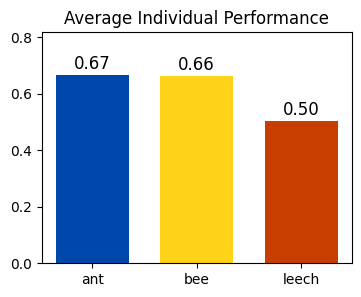

In [ ]:
column='theory'

# Calculate the average value of the specified column for each category
avg_values = df.groupby('groupflow')[column].mean()

# Get unique categories in 'groupflow' column
categories = df['groupflow'].unique()

# Define colors for each category
colors = ['#0047AB','#FFD319', '#C83D00']  # Add more colors if needed

# Specify the order of categories
category_order = ['ant', 'bee', 'leech']

# Create a figure and axis objects
fig, ax = plt.subplots()

# Specify the width of the bars
bar_width = 0.7

# Create a bar for each category
for i, cat in enumerate(category_order):
    plt.bar(
        x=cat,
        height=avg_values[cat],
        color=colors[category_order.index(cat)],
        width=bar_width,
        label=cat
    )

    # Add text labels on top of each bar with adjusted vertical position
    ax.text(
        x=i,
        y=avg_values[cat] + 0.02,  # Adjust the vertical position
        s=f'{avg_values[cat]:.2f}',
        ha='center',
        fontsize=12
    )

# Set labels and title

plt.title('Average Individual Performance')

# Set the x-axis ticks to be the category names
plt.xticks(range(len(category_order)), category_order)



# Adjust the figure size
fig.set_size_inches(4,3)

# Add a little extra space at the top of the plot for better visibility of labels
plt.ylim(0, max(avg_values.values) + 0.15)

# Show the plot
plt.show()


## Group Analysis

### Data Import

In [ ]:
# Calculate the percentage of 'groupflow' equal to 'bee' for each group
df['bee_percentage'] = df.groupby('group')['groupflow'].transform(lambda x: (x == 'bee').mean() )
group_dict = df.set_index('group')['bee_percentage'].to_dict()

# Calculate the percentage of 'groupflow' equal to 'bee' for each group
df['ant_percentage'] = df.groupby('group')['groupflow'].transform(lambda x: (x == 'ant').mean() )
group_ant = df.set_index('group')['ant_percentage'].to_dict()

# Calculate the percentage of 'groupflow' equal to 'bee' for each group
df['leech_percentage'] = df.groupby('group')['groupflow'].transform(lambda x: (x == 'leech').mean() )
group_leech = df.set_index('group')['leech_percentage'].to_dict()

# Group the DataFrame by 'group' and calculate the mean of 'theory'
group_means = df.groupby('group')['theory'].mean()
indiv_dict = group_means.to_dict()

In [ ]:
dfg.head(15)

,turns_in_a_min,stdev_indiv_spoken_time_ratio,stdev_average_turn_duration,min_average_turn_duration,max_average_turn_duration,stdev_average_turn_duration_ratio,min_average_turn_duration_ratio,max_average_turn_duration_ratio,diff_average_turn_duration_ratio,avg_avg_time_without_speaking,stdev_avg_time_without_speaking,min_avg_time_without_speaking,max_avg_time_without_speaking,diff_avg_time_without_speaking,stdev_avg_time_without_speaking_ratio,min_avg_time_without_speaking_ratio,max_avg_time_without_speaking_ratio,diff_avg_time_without_speaking_ratio,avg_max_time_without_speaking,stdev_max_time_without_speaking,min_max_time_without_speaking,max_max_time_without_speaking,diff_max_time_without_speaking,avg_max_time_without_speaking_ratio,stdev_max_time_without_speaking_ratio,min_max_time_without_speaking_ratio,max_max_time_without_speaking_ratio,diff_max_time_without_speaking_ratio,avg_num_turns,stdev_num_turns,min_num_turns,max_num_turns,diff_num_turns,avg_num_turns_ratio,stdev_num_turns_ratio,min_num_turns_ratio,max_num_turns_ratio,diff_num_turns_ratio,avg_avg_turns_without_speaking,stdev_avg_turns_without_speaking,min_avg_turns_without_speaking,max_avg_turns_without_speaking,diff_avg_turns_without_speaking,avg_avg_turns_without_speaking_ratio,stdev_avg_turns_without_speaking_ratio,min_avg_turns_without_speaking_ratio,max_avg_turns_without_speaking_ratio,diff_avg_turns_without_speaking_ratio,avg_max_turns_without_speaking,stdev_max_turns_without_speaking,min_max_turns_without_speaking,max_max_turns_without_speaking,diff_max_turns_without_speaking,avg_max_turns_without_speaking_ratio,stdev_max_turns_without_speaking_ratio,min_max_turns_without_speaking_ratio,max_max_turns_without_speaking_ratio,diff_max_turns_without_speaking_ratio,avg_num_words,stdev_num_words,min_num_words,max_num_words,diff_num_words,avg_num_words_ratio,stdev_num_words_ratio,min_num_words_ratio,max_num_words_ratio,diff_num_words_ratio,avg_avg_words_turn,stdev_avg_words_turn,min_avg_words_turn,max_avg_words_turn,diff_avg_words_turn,avg_avg_words_turn_ratio,stdev_avg_words_turn_ratio,min_avg_words_turn_ratio,max_avg_words_turn_ratio,diff_avg_words_turn_ratio,avg_max_words_turn,stdev_max_words_turn,min_max_words_turn,max_max_words_turn,diff_max_words_turn,avg_max_words_turn_ratio,stdev_max_words_turn_ratio,min_max_words_turn_ratio,max_max_words_turn_ratio,diff_max_words_turn_ratio,messages_sent_mean,messages_sent_std,messages_sent_avg_difference,messages_total_mean,messages_total_std,messages_total_avg_difference,contribution_index_mean,contribution_index_std,contribution_index_avg_difference,sentiment_avg_mean,sentiment_avg_std,sentiment_avg_avg_difference,emotionality_avg_mean,emotionality_avg_std,emotionality_avg_avg_difference,influence_message_avg_mean,influence_message_avg_std,influence_message_avg_avg_difference,influence_total_in_mean,influence_message_avg_in_mean,influence_message_avg_in_std,influence_message_avg_in_avg_difference,influence_total_mean,contribution_index_oscillation_mean,contribution_index_oscillation_std,contribution_index_oscillation_avg_difference,activity_entanglement_mean,activity_entanglement_std,activity_entanglement_avg_difference,ALTERNATIVE_REALITIES_Treehugger_mean,ALTERNATIVE_REALITIES_Treehugger_std,ALTERNATIVE_REALITIES_Treehugger_avg_difference,ALTERNATIVE_REALITIES_Fatherlander_mean,ALTERNATIVE_REALITIES_Fatherlander_std,ALTERNATIVE_REALITIES_Fatherlander_avg_difference,ALTERNATIVE_REALITIES_Spiritualism_mean,ALTERNATIVE_REALITIES_Spiritualism_std,ALTERNATIVE_REALITIES_Spiritualism_avg_difference,ALTERNATIVE_REALITIES_Nerd_mean,ALTERNATIVE_REALITIES_Nerd_std,ALTERNATIVE_REALITIES_Nerd_avg_difference,EMOTIONS_Fear_mean,EMOTIONS_Fear_std,EMOTIONS_Fear_avg_difference,EMOTIONS_Happy_mean,EMOTIONS_Happy_std,EMOTIONS_Happy_avg_difference,EMOTIONS_Sad_mean,EMOTIONS_Sad_std,EMOTIONS_Sad_avg_difference,EMOTIONS_Anger_mean,EMOTIONS_Anger_std,EMOTIONS_Anger_avg_difference,Groupflow_Beeflow_mean,Groupflow_Beeflow_std,Groupflow_Beefl

### Data Preparation

In [ ]:
# Create a new column 'bee_percentage' using the dictionary values
dfg['bee_percentage'] = dfg.index.map(group_dict)
dfg['indiv_mean_perf'] = dfg.index.map(indiv_dict)
dfg['ant_percentage'] = dfg.index.map(group_ant)
dfg['leech_percentage'] = dfg.index.map(group_leech)

# Create a new column 'has_bee' based on 'bee_percentage' values
dfg['has_bee'] = dfg['bee_percentage'] > 0

In [ ]:
import pandas as pd

# Assuming you have a dataframe called 'df'
pattern_starts_with = '^diff'
columns_to_drop_starts_with = dfg.filter(regex=pattern_starts_with).columns
print(columns_to_drop_starts_with)

# Drop the columns that start with 'diff'
dfg = dfg.drop(columns=columns_to_drop_starts_with)

# Assuming you have a dataframe called 'df'
pattern_ends_with = 'difference$'
columns_to_drop_ends_with = dfg.filter(regex=pattern_ends_with).columns
print(columns_to_drop_ends_with)

# Drop the columns that end with 'difference'
dfg = dfg.drop(columns=columns_to_drop_ends_with)
dfg = dfg.drop(columns='min_theory')


Index(['diff_average_turn_duration_ratio', 'diff_avg_time_without_speaking',
       'diff_avg_time_without_speaking_ratio',
       'diff_max_time_without_speaking',
       'diff_max_time_without_speaking_ratio', 'diff_num_turns',
       'diff_num_turns_ratio', 'diff_avg_turns_without_speaking',
       'diff_avg_turns_without_speaking_ratio',
       'diff_max_turns_without_speaking',
       'diff_max_turns_without_speaking_ratio', 'diff_num_words',
       'diff_num_words_ratio', 'diff_avg_words_turn',
       'diff_avg_words_turn_ratio', 'diff_max_words_turn',
       'diff_max_words_turn_ratio'],
      dtype='object')
Index(['messages_sent_avg_difference', 'messages_total_avg_difference',
       'contribution_index_avg_difference', 'sentiment_avg_avg_difference',
       'emotionality_avg_avg_difference',
       'influence_message_avg_avg_difference',
       'influence_message_avg_in_avg_difference',
       'contribution_index_oscillation_avg_difference',
       'activity_entanglement_avg

In [ ]:
dfg.head(15)

,turns_in_a_min,stdev_indiv_spoken_time_ratio,stdev_average_turn_duration,min_average_turn_duration,max_average_turn_duration,stdev_average_turn_duration_ratio,min_average_turn_duration_ratio,max_average_turn_duration_ratio,avg_avg_time_without_speaking,stdev_avg_time_without_speaking,min_avg_time_without_speaking,max_avg_time_without_speaking,stdev_avg_time_without_speaking_ratio,min_avg_time_without_speaking_ratio,max_avg_time_without_speaking_ratio,avg_max_time_without_speaking,stdev_max_time_without_speaking,min_max_time_without_speaking,max_max_time_without_speaking,avg_max_time_without_speaking_ratio,stdev_max_time_without_speaking_ratio,min_max_time_without_speaking_ratio,max_max_time_without_speaking_ratio,avg_num_turns,stdev_num_turns,min_num_turns,max_num_turns,avg_num_turns_ratio,stdev_num_turns_ratio,min_num_turns_ratio,max_num_turns_ratio,avg_avg_turns_without_speaking,stdev_avg_turns_without_speaking,min_avg_turns_without_speaking,max_avg_turns_without_speaking,avg_avg_turns_without_speaking_ratio,stdev_avg_turns_without_speaking_ratio,min_avg_turns_without_speaking_ratio,max_avg_turns_without_speaking_ratio,avg_max_turns_without_speaking,stdev_max_turns_without_speaking,min_max_turns_without_speaking,max_max_turns_without_speaking,avg_max_turns_without_speaking_ratio,stdev_max_turns_without_speaking_ratio,min_max_turns_without_speaking_ratio,max_max_turns_without_speaking_ratio,avg_num_words,stdev_num_words,min_num_words,max_num_words,avg_num_words_ratio,stdev_num_words_ratio,min_num_words_ratio,max_num_words_ratio,avg_avg_words_turn,stdev_avg_words_turn,min_avg_words_turn,max_avg_words_turn,avg_avg_words_turn_ratio,stdev_avg_words_turn_ratio,min_avg_words_turn_ratio,max_avg_words_turn_ratio,avg_max_words_turn,stdev_max_words_turn,min_max_words_turn,max_max_words_turn,avg_max_words_turn_ratio,stdev_max_words_turn_ratio,min_max_words_turn_ratio,max_max_words_turn_ratio,messages_sent_mean,messages_sent_std,messages_total_mean,messages_total_std,contribution_index_mean,contribution_index_std,sentiment_avg_mean,sentiment_avg_std,emotionality_avg_mean,emotionality_avg_std,influence_message_avg_mean,influence_message_avg_std,influence_total_in_mean,influence_message_avg_in_mean,influence_message_avg_in_std,influence_total_mean,contribution_index_oscillation_mean,contribution_index_oscillation_std,activity_entanglement_mean,activity_entanglement_std,ALTERNATIVE_REALITIES_Treehugger_mean,ALTERNATIVE_REALITIES_Treehugger_std,ALTERNATIVE_REALITIES_Fatherlander_mean,ALTERNATIVE_REALITIES_Fatherlander_std,ALTERNATIVE_REALITIES_Spiritualism_mean,ALTERNATIVE_REALITIES_Spiritualism_std,ALTERNATIVE_REALITIES_Nerd_mean,ALTERNATIVE_REALITIES_Nerd_std,EMOTIONS_Fear_mean,EMOTIONS_Fear_std,EMOTIONS_Happy_mean,EMOTIONS_Happy_std,EMOTIONS_Sad_mean,EMOTIONS_Sad_std,EMOTIONS_Anger_mean,EMOTIONS_Anger_std,Groupflow_Beeflow_mean,Groupflow_Beeflow_std,Groupflow_Leechflow_mean,Groupflow_Leechflow_std,Groupflow_Antflow_mean,Groupflow_Antflow_std,ethical_likelihood_mean,ethical_likelihood_std,financial_likelihood_mean,financial_likelihood_std,health_likelihood_mean,health_likelihood_std,recreational_likelihood_mean,recreational_likelihood_std,social_likelihood_mean,social_likelihood_std,total_likelihood_mean,total_likelihood_std,ethical_perceived_mean,ethical_perceived_std,financial_perceived_mean,financial_perceived_std,health_perceived_mean,health_perceived_std,recreational_perceived_mean,recreational_perceived_std,social_perceived_mean,social_perceived_std,total_perceived_mean,total_perceived_std,O_mean,O_std,C_mean,C_std,E_mean,E_std,A_mean,A_std,N_mean,N_std,harm_care_score_mean,harm_care_score_std,fairness_reciprocity_score_mean,fairness_reciprocity_score_std,in_group_loyality_score_mean,in_group_loyality_score_std,authority_respect_score_mean,authority_respect_score_std,purity_sanctity_score_mean,purity_sanctity_score_std,dummy_question1_mean,dummy_question1_std,dummy_question2_mean,dummy_question2_std,q1_mean,q1_std,q2_mean,q2_std,q3_

### Analysis

In [ ]:
columns_to_drop= ['bee_percentage','ant_percentage','Groupflow_Antflow_mean']
dfg.rename(columns={'final_project': 'group_performance'}, inplace=True)

dfg = dfg.drop(columns=columns_to_drop)

In [ ]:
dfv= create_df_mean_and_ttest(dfg, 'has_bee',True,False)
dfv.head(20)

,True_mean,False_mean,p_value,t_stat
features,,,,
q8_mean,3.435417,4.491667,0.022581,-2.693043
q6_std,1.889617,1.249575,0.035013,2.437250
group_performance,0.812500,0.695000,0.036043,2.420302
Groupflow_Leechflow_mean,0.202287,0.123261,0.047044,2.264049
ethical_likelihood_mean,2.950347,2.366667,0.065032,2.072302
contribution_index_oscillation_std,0.578684,1.043157,0.078784,-1.957331
Groupflow_Leechflow_std,0.104310,0.067294,0.105560,1.779221
avg_max_turns_without_speaking_ratio,0.193750,0.229167,0.107908,-1.765668
avg_max_time_without_speaking_ratio,0.193750,0.229167,0.107908,-1.765668


In [ ]:
def calculate_correlations(df, column):
    # Select all numerical columns except the specified column
    numerical_columns = df.select_dtypes(include=[np.number]).columns.difference([column])

    # Calculate correlations
    correlations = df[numerical_columns].corrwith(df[column])

    return correlations

df['Groupflow_Beeflow'] = beeflow
correlations = calculate_correlations(df, 'Groupflow_Beeflow')
print(correlations)


A                                    -0.025312
ALTERNATIVE_REALITIES_Nerd            0.056836
ALTERNATIVE_REALITIES_Spiritualism   -0.249698
ALTERNATIVE_REALITIES_Treehugger      0.119244
C                                     0.056621
E                                    -0.056046
EMOTIONS_Anger                       -0.082377
EMOTIONS_Fear                         0.070471
EMOTIONS_Happy                        0.154794
EMOTIONS_Sad                         -0.269404
N                                     0.221310
O                                    -0.010832
activity_entanglement                -0.143013
alter_art                            -0.013692
alter_nudges                          0.108868
ant_percentage                       -0.340307
authority_respect_score               0.192574
average_turn_duration                 0.302387
average_turn_duration_ratio           0.184073
avg_time_without_speaking            -0.076496
avg_time_without_speaking_ratio      -0.022810
avg_turns_wit

### Visualization

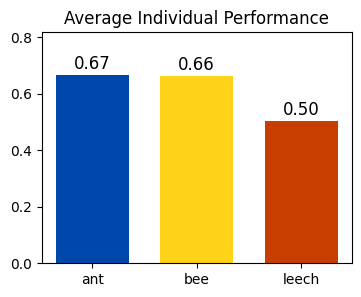

In [ ]:
column='theory'

# Calculate the average value of the specified column for each category
avg_values = df.groupby('groupflow')[column].mean()

# Get unique categories in 'groupflow' column
categories = df['groupflow'].unique()

# Define colors for each category
colors = ['#0047AB','#FFD319', '#C83D00']  # Add more colors if needed

# Specify the order of categories
category_order = ['ant', 'bee', 'leech']

# Create a figure and axis objects
fig, ax = plt.subplots()

# Specify the width of the bars
bar_width = 0.7

# Create a bar for each category
for i, cat in enumerate(category_order):
    plt.bar(
        x=cat,
        height=avg_values[cat],
        color=colors[category_order.index(cat)],
        width=bar_width,
        label=cat
    )

    # Add text labels on top of each bar with adjusted vertical position
    ax.text(
        x=i,
        y=avg_values[cat] + 0.02,  # Adjust the vertical position
        s=f'{avg_values[cat]:.2f}',
        ha='center',
        fontsize=12
    )

# Set labels and title

plt.title('Average Individual Performance')

# Set the x-axis ticks to be the category names
plt.xticks(range(len(category_order)), category_order)



# Adjust the figure size
fig.set_size_inches(4,3)

# Add a little extra space at the top of the plot for better visibility of labels
plt.ylim(0, max(avg_values.values) + 0.15)

# Show the plot
plt.show()


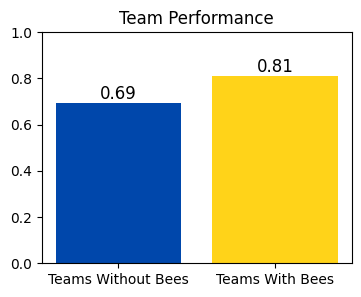

In [ ]:
import matplotlib.pyplot as plt

# Group the DataFrame by 'has_bee' column and calculate the average of 'final_project'
avg_final_project = dfg.groupby('has_bee')['final_project'].mean()

# Define custom colors for the bars
colors = ['#0047AB', '#FFD319']

# Define custom labels for the bars
labels = ['Teams Without Bees', 'Teams With Bees']

# Set a larger font size for the numbers on top of the bars
font_size = 12

# Set the figure size to make the chart smaller
plt.figure(figsize=(4, 3))  # Adjust the size as needed

# Plot the histogram with custom colors and labels
plt.bar(labels, avg_final_project, color=colors)

# Set labels and title
plt.title('Team Performance', fontsize=12)  # Adjust title font size

# Add custom text labels on top of each bar with larger font size
for i, value in enumerate(avg_final_project):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom', fontsize=font_size)

# Set the y-axis limit until 1
plt.ylim(0, 1)

# Display the plot
plt.show()


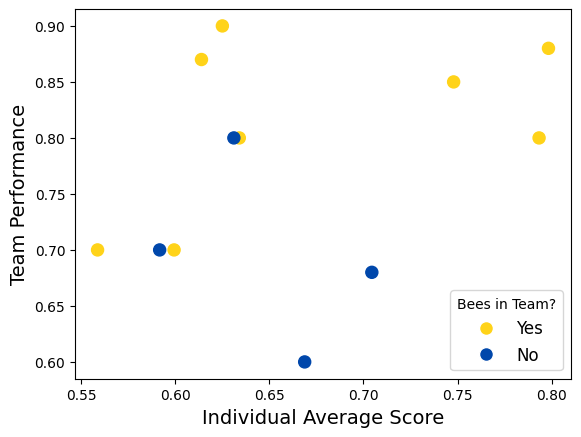

In [ ]:
import matplotlib.pyplot as plt

# Create a scatter plot with larger dots
plt.scatter(dfg['indiv_mean_perf'], dfg['final_project'], s=75, c=dfg['has_bee'].map({True: '#FFD319', False: '#0047AB'}))

# Set labels and title with increased font size
plt.xlabel('Individual Average Score', fontsize=14)  # Adjust the fontsize as needed
plt.ylabel('Team Performance', fontsize=14)  # Adjust the fontsize as needed

# Create a legend with explanations and increased font size
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#FFD319', markersize=10, label='Yes'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#0047AB', markersize=10, label='No')
]
plt.legend(handles=legend_elements, loc='lower right', title='Bees in Team?', fontsize=12)  # Adjust the fontsize as needed

# Display the plot
plt.show()


In [ ]:
correlation_coefficient = dfg['indiv_mean_perf'].corr(dfg['final_project'])
print(f"Correlation Coefficient: {correlation_coefficient:.2f}")


Correlation Coefficient: 0.31


In [ ]:
correlation_coefficient = dfg['bee_percentage'].corr(dfg['final_project'])
print(f"Correlation Coefficient: {correlation_coefficient:.2f}")

Correlation Coefficient: 0.22


In [ ]:
correlation_coefficient = dfg['ant_percentage'].corr(dfg['final_project'])
print(f"Correlation Coefficient: {correlation_coefficient:.2f}")

Correlation Coefficient: -0.14


In [ ]:
correlation_coefficient = dfg['leech_percentage'].corr(dfg['final_project'])
print(f"Correlation Coefficient: {correlation_coefficient:.2f}")

Correlation Coefficient: -0.24


In [ ]:
# hacer también las correlaciones con los porcentajes directos